Numerical Solutions of PDEs (Exploratory Notebook)

[Dhavall](https://github.com/DhavallRaja/Modeling-Earth-s-Climate-Trends) and [Arya](https://github.com/TheAnveshak/chemical-engineering-computation/tree/main/Distillation_Column)

This repository contains a collaborative exploratory notebook focused on the formulation and numerical treatment of classical partial differential equations commonly encountered in physics and engineering.

What’s covered:

- 1D and 2D heat / diffusion equations

- Laplace equation (steady-state diffusion)

- Wave equation

- Simple reaction-diffusion extensions

- Translation of governing PDEs into computational form

- Discretization ideas and numerical experimentation (finite-difference)

The notebook is meant as a learning and experimentation space, emphasizing how continuous PDE models are converted into solvable numerical problems, rather than being a polished solver library.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp, solve_bvp
import matplotlib.pyplot as plt

$$
\frac{\partial u}{\partial t} = \alpha*\frac{\partial^{2} u}{\partial x^2}
$$

Text(0.5, 1.0, 'Temperature Distribution')

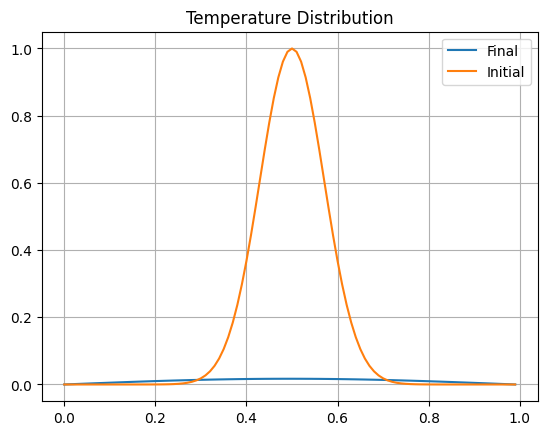

In [3]:
alpha = 0.01
nx = 100
L = 1 #m
dx = L/(nx)
t_final = 30
dt = 0.05

x = np.arange(0,L,dx)
u_initial = np.exp(-100 * (x - 0.5*L)**2)

def heat_equation(t,u):
    d2u_dx2 = np.zeros_like(u)
    for i in range(1,len(d2u_dx2)-1):
        d2u_dx2[i] = (u[i+1]+u[i-1]-2*u[i])/dx**2
    du_dt = alpha*d2u_dx2
    return du_dt
t_span = (0,t_final+dt)  # Time interval
t_eval = np.arange(0, t_final+dt, dt)  # Time evaluation points

solution = solve_ivp(heat_equation, t_span, u_initial, t_eval = t_eval)
sol_dict = {solution.t[i]:solution.y[:,i] for i in range(len(solution.t))}
plt.plot(x, sol_dict[t_final], label = "Final")
plt.plot(x, sol_dict[0.0], label = "Initial")
plt.grid()
plt.legend()
plt.title("Temperature Distribution")

$$
\frac{\partial u}{\partial t} = \alpha*\frac{\partial^{2} u}{\partial x^2}
$$

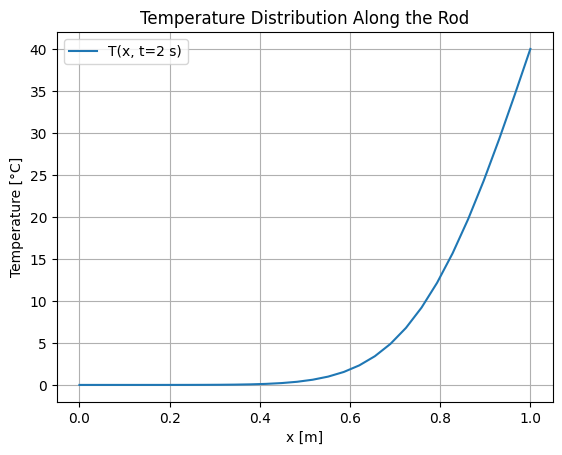

In [4]:
alpha = 0.01
nx = 30
L = 1.0
dx = L / (nx - 1)
dt = 0.05
t_final =

# Discretized space and time
x = np.linspace(0, L, nx)
nt = int(t_final / dt)

# Initial and boundary conditions
u = np.zeros(nx)
u[0] = 0
u[-1] = 40

# Time stepping
for n in range(nt):
    u_new = u.copy()
    for i in range(1, nx - 1):
        u_new[i] = u[i] + (alpha * dt / dx**2) * (u[i+1] - 2*u[i] + u[i-1])
    u = u_new

# Plot
plt.plot(x, u, label=f'T(x, t={t_final} s)')
plt.xlabel('x [m]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature Distribution Along the Rod')
plt.grid(True)
plt.legend()
plt.show()

$$
    \frac{\partial u}{\partial t} = \alpha*(\frac{\partial^{2} u}{\partial x^2} + \frac{\partial^{2} u}{\partial y^2})
$$

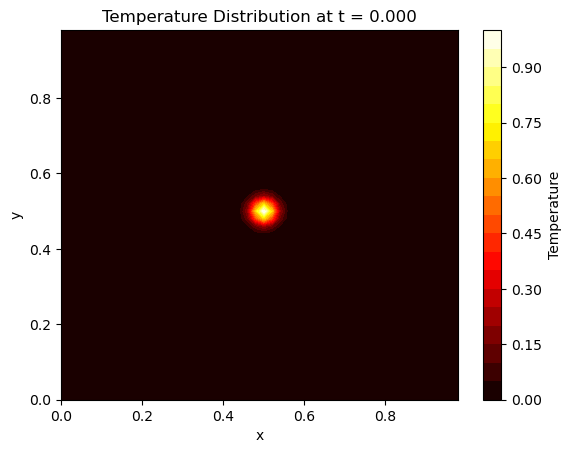

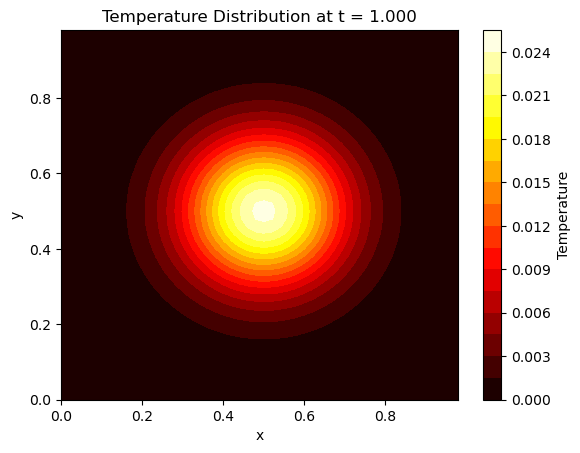

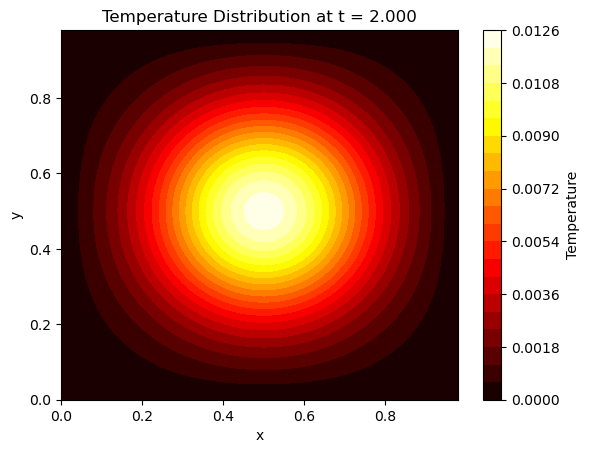

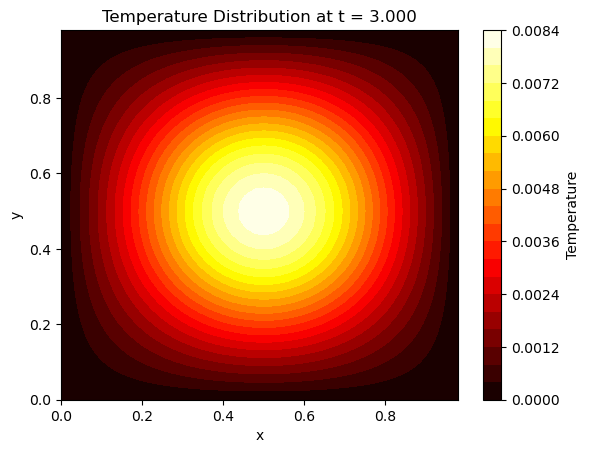

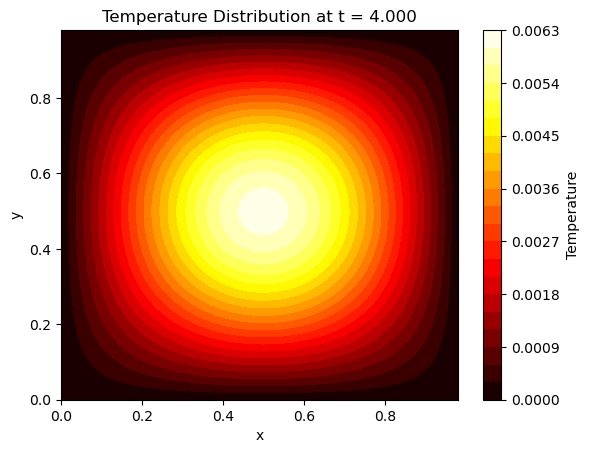

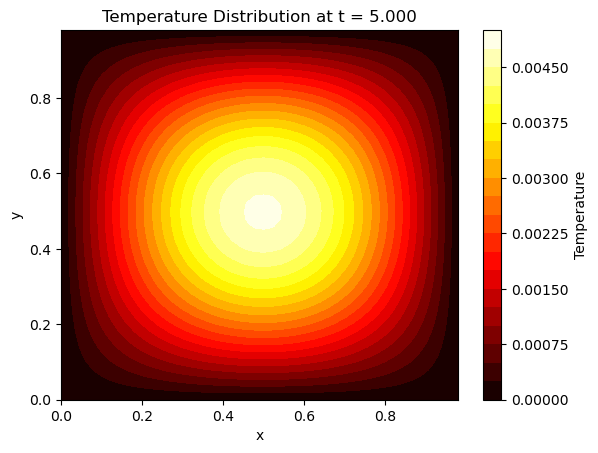

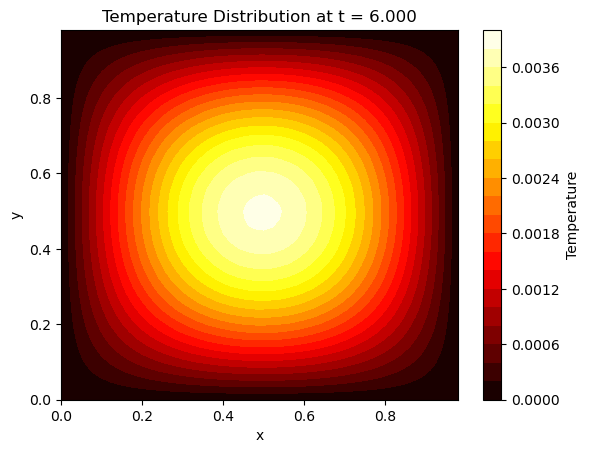

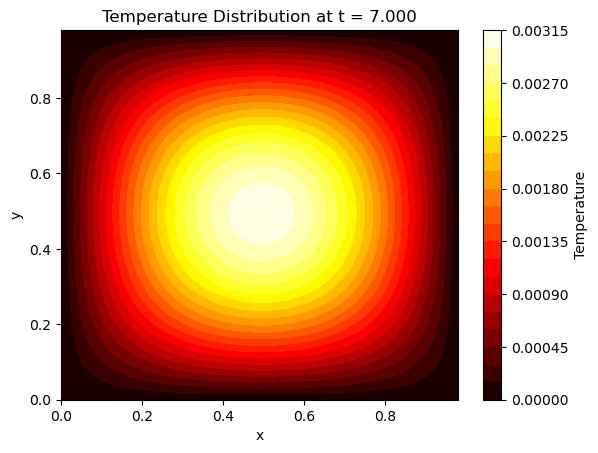

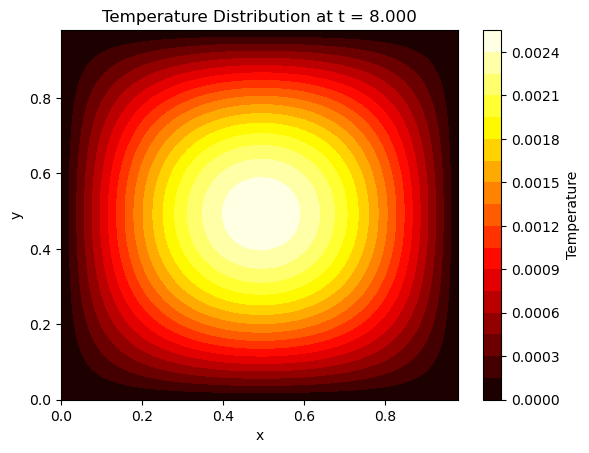

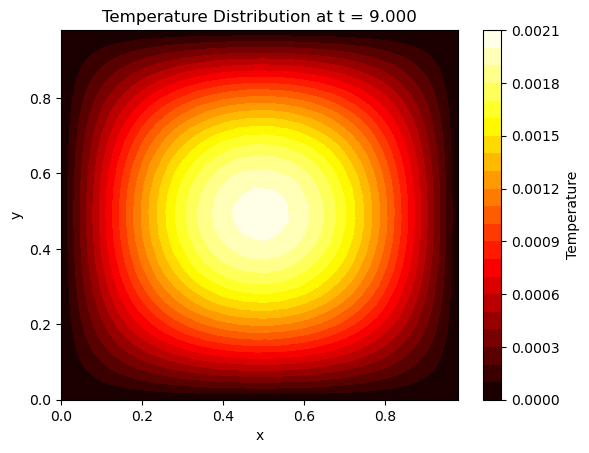

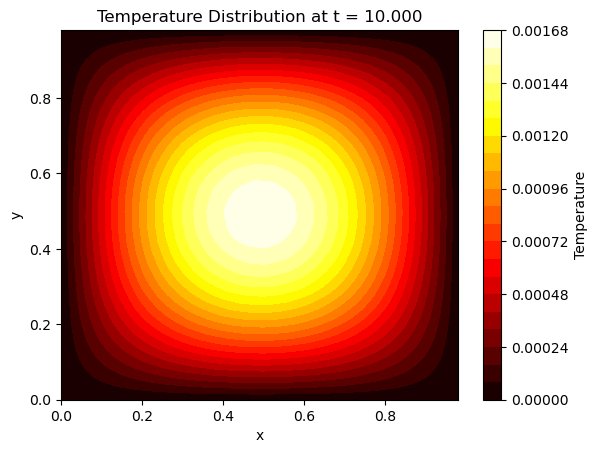

In [ ]:
alpha = 0.01
Lx, Ly = 1.0, 1.0
nx, ny = 50, 50
dx, dy = Lx /nx, Ly /ny
x = np.arange(0,Lx,dx)
y = np.arange(0,Ly,dy)
t_final = 10
dt = 0.05

# Create a meshgrid for 2D domain
X, Y = np.meshgrid(x, y)

# Flatten the initial condition
u_initial = np.exp(-1000 * ((X - 0.5)**2 + (Y - 0.5)**2)).flatten()

def heat_equation_2d(t, u):
    u = u.reshape((nx, ny))
    dudx2 = np.zeros_like(u)
    dudy2 = np.zeros_like(u)

    dudx2[1:-1, :] = (u[2:, :] - 2 * u[1:-1, :] + u[:-2, :]) / dx**2
    dudy2[:, 1:-1] = (u[:, 2:] - 2 * u[:, 1:-1] + u[:, :-2]) / dy**2

    # Return the result as a flattened array
    return (alpha * (dudx2 + dudy2)).flatten()

t_span = (0, t_final+dt)
t_eval = np.arange(0,t_final+dt,dt)

sol = solve_ivp(heat_equation_2d, t_span, u_initial, method='RK45', t_eval=t_eval)

# Plot the solution at different time steps
for i in range(0, len(sol.t), 20):
    plt.figure()
    u_plot = sol.y[:, i].reshape((nx, ny))
    plt.contourf(X, Y, u_plot, 20, cmap='hot')
    plt.colorbar(label='Temperature')
    plt.title(f'Temperature Distribution at t = {sol.t[i]:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

$$
0 = \alpha*(\frac{\partial^{2} u}{\partial x^2} + \frac{\partial^{2} u}{\partial y^2})
$$

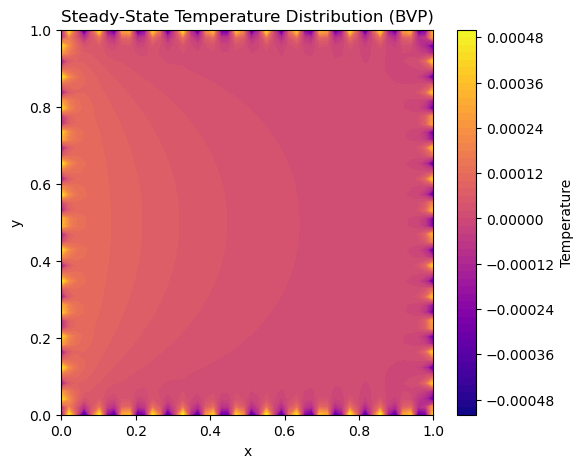

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Domain parameters
Lx, Ly = 1.0, 1.0
nx, ny = 50, 50
dx, dy = Lx / nx, Ly / ny

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Number of unknowns
N = nx * ny

# Boundary conditions
# Example: u = 1 on left, u = 0 on right, u = 0 on top & bottom
u_left, u_right, u_top, u_bottom = 1.0, 0.0, 0.0, 0.0

# Initialize right-hand side vector
b = np.zeros(N)

# Construct the sparse matrix for the Laplace operator
main_diag = -2 / dx**2 - 2 / dy**2
off_diag_x = 1 / dx**2
off_diag_y = 1 / dy**2

# Create diagonals
diagonals = [main_diag * np.ones(N),
             off_diag_x * np.ones(N - 1),
             off_diag_x * np.ones(N - 1),
             off_diag_y * np.ones(N - nx),
             off_diag_y * np.ones(N - nx)]

# Build the sparse matrix
A = diags(diagonals, [0, -1, 1, -nx, nx], format='csr')

# Correct for boundary coupling between rows
for i in range(1, ny):
    A[i * nx, i * nx - 1] = 0
    A[i * nx - 1, i * nx] = 0

# Apply boundary conditions
for j in range(ny):
    for i in range(nx):
        k = j * nx + i  # linear index

        if i == 0:  # Left
            A[k, k] = 1
            b[k] = u_left
        elif i == nx - 1:  # Right
            A[k, k] = 1
            b[k] = u_right
        elif j == 0:  # Bottom
            A[k, k] = 1
            b[k] = u_bottom
        elif j == ny - 1:  # Top
            A[k, k] = 1
            b[k] = u_top

# Solve the linear system
u = spsolve(A, b)

# Reshape to 2D field
U = u.reshape((ny, nx))

# Plot the steady-state solution
plt.figure(figsize=(6, 5))
plt.contourf(X, Y, U, 50, cmap='plasma')
plt.colorbar(label='Temperature')
plt.title('Steady-State Temperature Distribution (BVP)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$$
    \frac{\partial^{2} u}{\partial t^2} = \alpha^2*\frac{\partial^{2} u}{\partial x^2}
$$

Text(0.5, 1.0, 'Function Distribution')

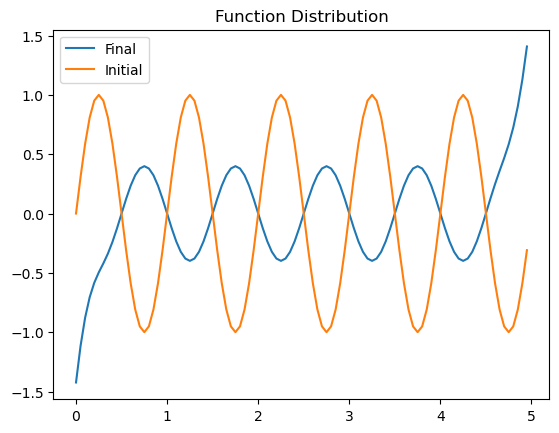

In [ ]:
alpha2 = 0.1
nx = 100
L = 5#m
dx = L/(nx)
t_final = 1
dt = 0.05

x = np.arange(0,L,dx)

# Since it's second order we would also need to provide one more initial condition
u_initial = np.sin(2*np.pi*x)
du_dt_initial = np.zeros(len(u_initial))

# Now we just join both the initial Conditions
Y_initial = np.concatenate((u_initial,du_dt_initial), axis=0)
def wave_equation(t,Y):
    u = Y[0:nx] # first nx values correspond to function
    du_dt = Y[nx:] # rest of the values are derivative part
    d2u_dx2 = np.zeros_like(u)
    d2u_dx2[0] = (u[2] +u[0] -2*u[1] )/dx**2
    d2u_dx2[-1]= (u[-1]+u[-3]-2*u[-2])/dx**2
    for i in range(1,len(d2u_dx2)-1):
        d2u_dx2[i] = (u[i+1]+u[i-1]-2*u[i])/dx**2
    d2u_dt2 = alpha2*d2u_dx2
    du_dt = du_dt + d2u_dt2*dt

    #Return the joint array of both
    dY_dt = np.concatenate((du_dt,d2u_dt2),axis=0)
    return dY_dt
t_span = (0,t_final+dt)
t_eval = np.arange(0, t_final+dt, dt)

solution = solve_ivp(wave_equation, t_span, Y_initial, t_eval = t_eval)

# Plotting the solution
sol_dict = {solution.t[i]:solution.y[0:nx,i] for i in range(len(t_eval))}
plt.plot(x, sol_dict[t_final], label = "Final")
plt.plot(x, sol_dict[0.0], label = "Initial")
plt.legend()
plt.title("Function Distribution")

$$
\frac{\partial u}{\partial t} = \alpha*\frac{\partial^{2} u}{\partial x^2} + e^{(-\beta*u)}
$$

Text(0.5, 1.0, 'Property Distribution')

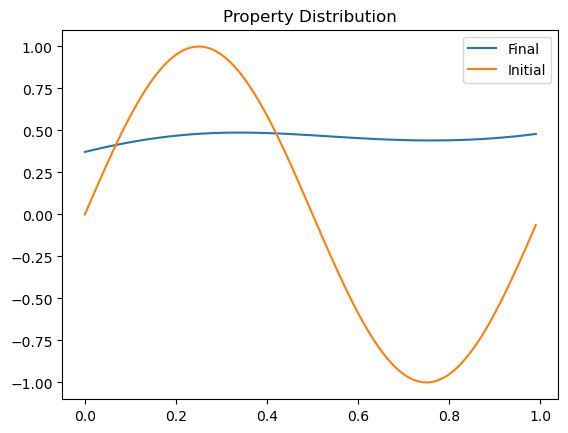

In [ ]:
alpha = 0.01
beta = 10
nx = 100
L = 1 #m
dx = L/(nx)
t_final = 5
dt = 0.05

x = np.arange(0,L,dx)
u_initial = np.sin(2*np.pi*x)

def PDE_equation(t,u):
    d2u_dx2 = np.zeros_like(u)
    d2u_dx2[0] = (u[2] +u[0] -2*u[1] )/dx**2
    d2u_dx2[-1]= (u[-1]+u[-3]-2*u[-2])/dx**2
    for i in range(1,len(d2u_dx2)-1):
        d2u_dx2[i] = (u[i+1]+u[i-1]-2*u[i])/dx**2
    du_dt = alpha*d2u_dx2 + np.exp(-beta*u)
    return du_dt
t_span = (0,t_final+dt)  # Time interval
t_eval = np.arange(0, t_final+dt, dt)  # Time evaluation points

solution = solve_ivp(PDE_equation, t_span, u_initial, t_eval = t_eval)
sol_dict = {solution.t[i]:solution.y[:,i] for i in range(len(solution.t))}
plt.plot(x, sol_dict[t_final], label = "Final")
plt.plot(x, sol_dict[0.0], label = "Initial")
plt.legend()
plt.title("Property Distribution")